In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [21]:
full_lst=os.listdir("evaluation_log_noise/noise_v1")
log_error_lst=[]
noise_levels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
noise_df=pd.DataFrame(columns=["exp", "synth"], index=noise_levels)
data_lst=[]
for case in ["exp", "synth"]:
    for noise_level in noise_levels:
        log_error_lst=[]
        for filename in full_lst:
            noise_matches=re.findall(f".*\_({noise_level}).*_logerror_{case}.csv$", filename)
            if noise_matches:
                log_error_lst.append(np.loadtxt(f"evaluation_log_noise/noise_v1/{filename}"))
        noise_df.loc[noise_level, case]=log_error_lst
noise_df

,exp,synth
0.0,"[[0.30641815362036917, 0.6624672126366402, 0.5...","[[[0.004982063946080473, 0.004982063946080473,..."
0.1,"[[0.3094187482823375, 0.47447783680959615, 0.2...","[[[0.02199657817264117, 0.02199657817264117, 0..."
0.2,"[[0.32017015125404896, 0.39054398644115734, 0....","[[[0.0599679112882728, 0.0599679112882728, 0.0..."
0.3,"[[0.24488633451024588, 0.35131285824129177, 0....","[[[0.099224616403283, 0.099224616403283, 0.099..."
0.4,"[[0.24405774150026854, 0.3745725778865206, 0.2...","[[[0.12017933517522775, 0.12017933517522775, 0..."
0.5,"[[0.2796883635076521, 0.3942668738607398, 0.25...","[[[0.20658495965615378, 0.20658495965615378, 0..."


In [30]:
np.concatenate(noise_df.loc[0.0]["synth"])

array([[0.00498206, 0.00498206, 0.00498206, ..., 0.00498206, 0.00498206,
        0.00498206],
       [0.03275543, 0.03275543, 0.03275543, ..., 0.03275543, 0.03275543,
        0.03275543],
       [0.00139291, 0.00139291, 0.00139291, ..., 0.00139291, 0.00139291,
        0.00139291],
       ...,
       [0.00831089, 0.00831089, 0.00831089, ..., 0.00831089, 0.00831089,
        0.00831089],
       [0.01067986, 0.01067986, 0.01067986, ..., 0.01067986, 0.01067986,
        0.01067986],
       [0.00113419, 0.00113419, 0.00113419, ..., 0.00113419, 0.00113419,
        0.00113419]])

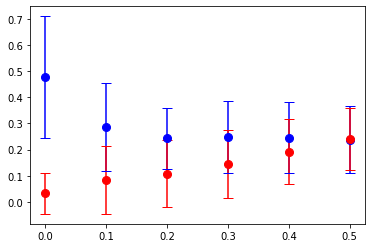

In [31]:
prev_value = 1
name = ""
fig, ax = plt.subplots(1)
for case, color in zip(["exp", "synth"], ["blue", "red"]):
    for noise_level in noise_levels:
        ax.errorbar(noise_level, np.mean(np.array(noise_df.loc[noise_level, case])), np.std(np.array(noise_df.loc[noise_level, case])), fmt='o', markersize=8, capsize=5, color=color)
# noise_dict
# for file in log_error_lst:
#     noise = re.findall("0\.\d", file)[-1]
#     print(noise)
#     data = pd.read_csv(f"evaluation_log_noise/{file}")
#     print(data)
#     data_mean = data.values.mean()
#     data_std = data.values.std()
#     print(data_std)
#     ax.errorbar(float(noise), data_mean, data_std,
#                 fmt='o', markersize=8, capsize=5)
